In [55]:
import cv2
import numpy as np

# to show the plot in the jupyter notebook
def show(x):
    display(Image.fromarray(x))

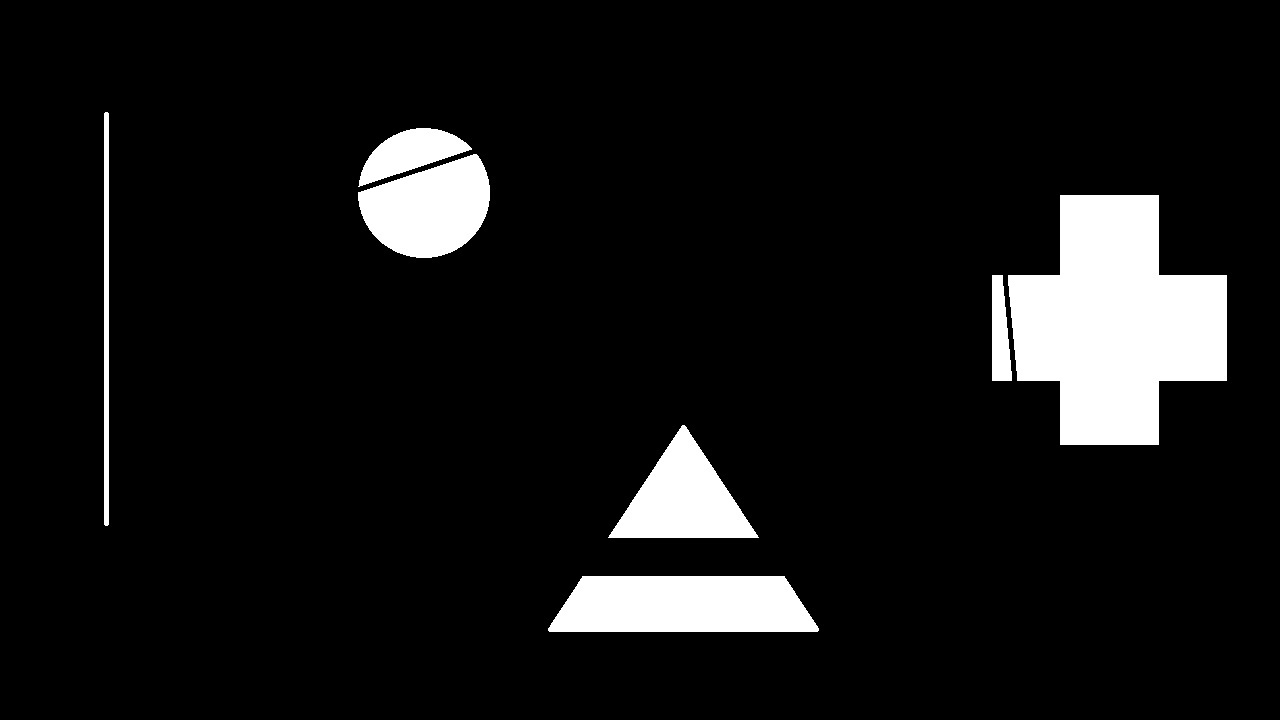

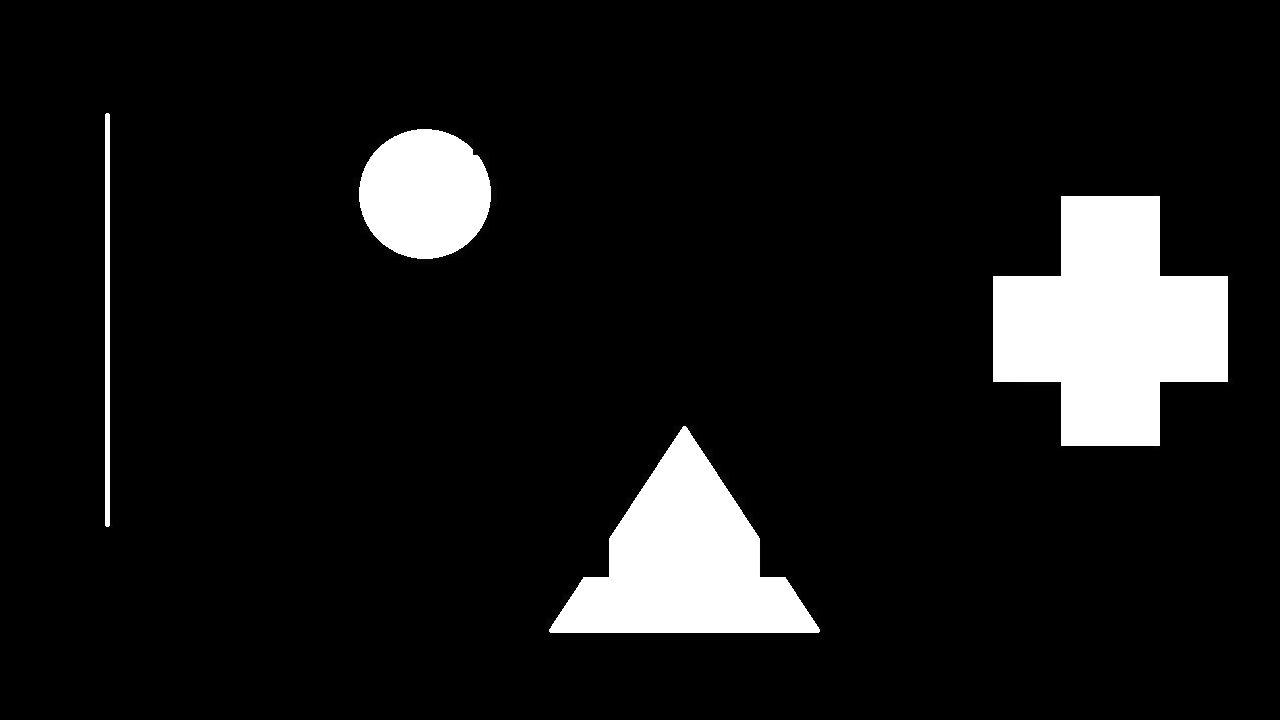

with closing, the figures inner holes are closed, however the edges of the triangle are still not fully rounded


In [139]:
img = cv2.imread("practicum/operations_2.jpg")

original =cv2.imread("practicum/operations_1.jpg")
kernel = np.ones((50, 50),np.uint8) 
result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) 
show(img)
print("RESULT:")
show(result) 
print("After applying closing the figures' inner holes are closed, however the edges of the triangle are still not fully shaped")


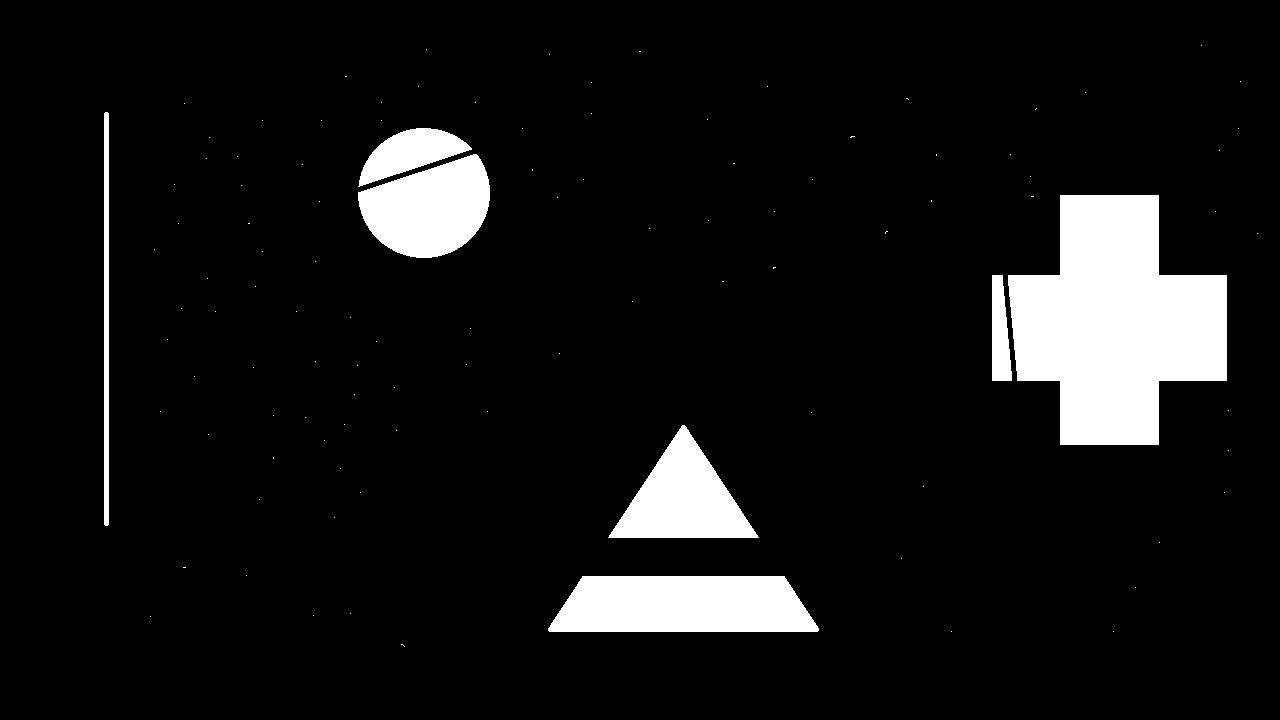

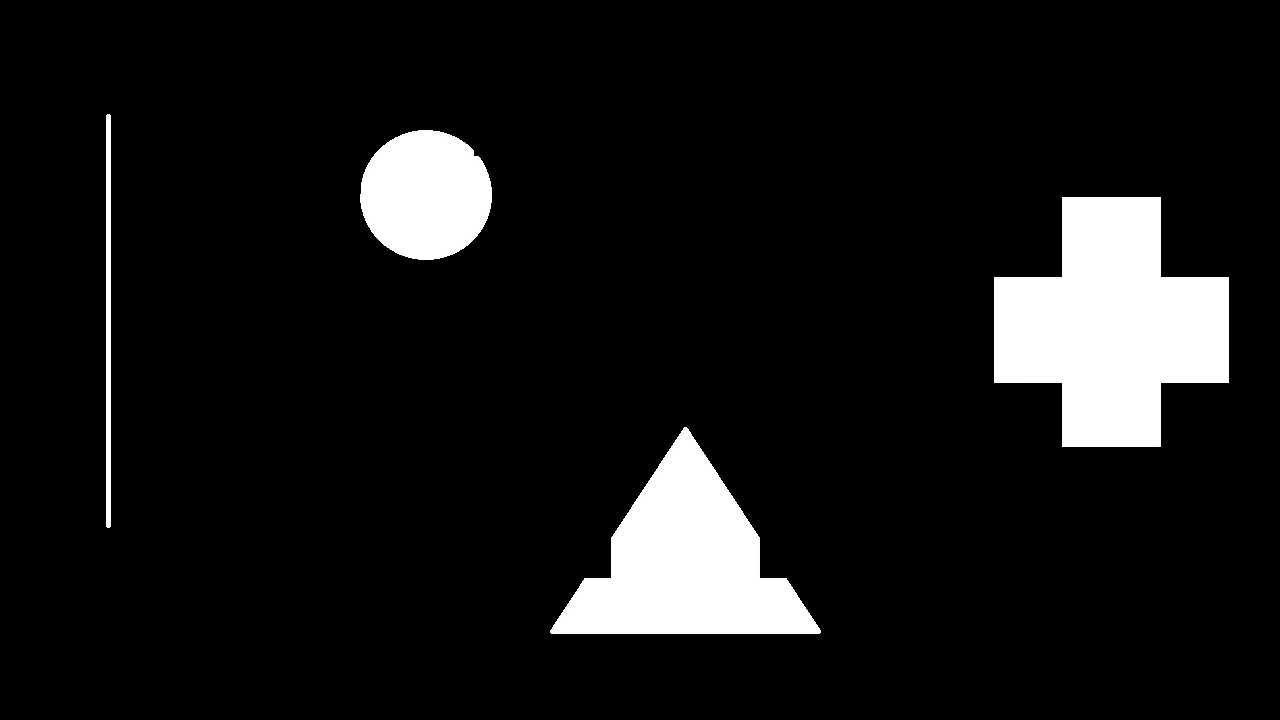

apply opening to eliminate the noise


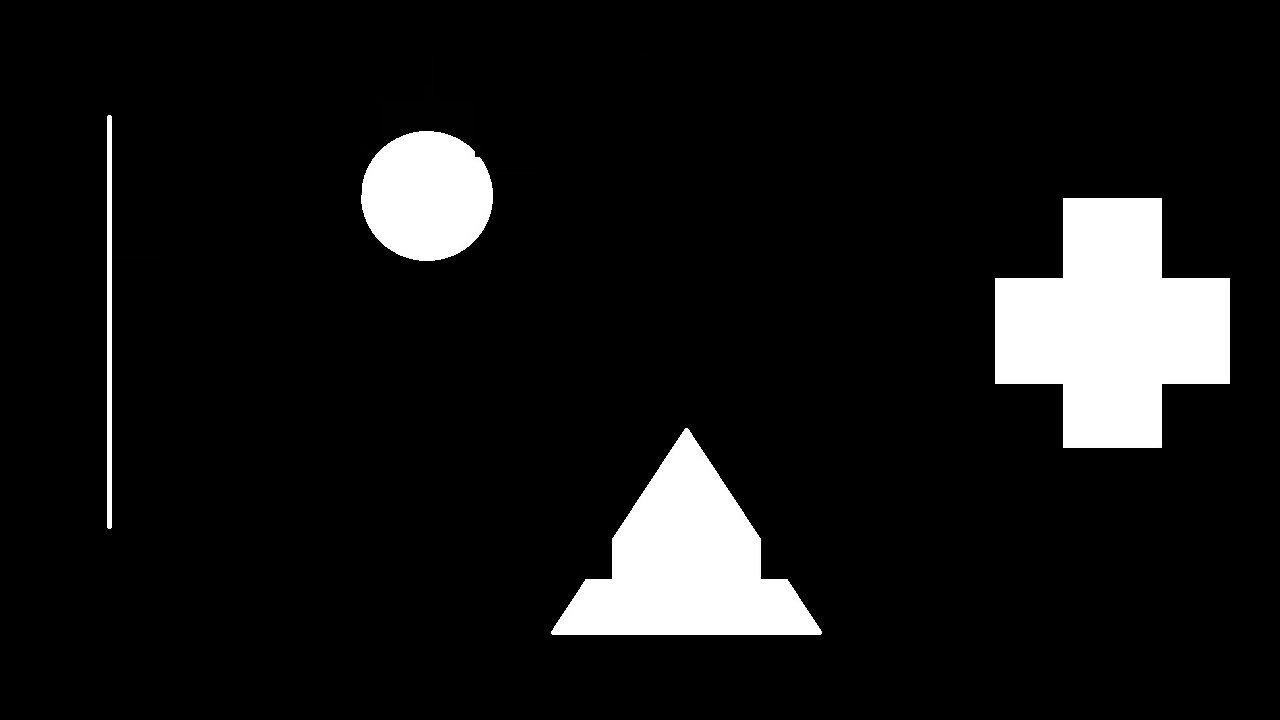

apply closing to correct the triangle withe a kernel of lower traingle matrix


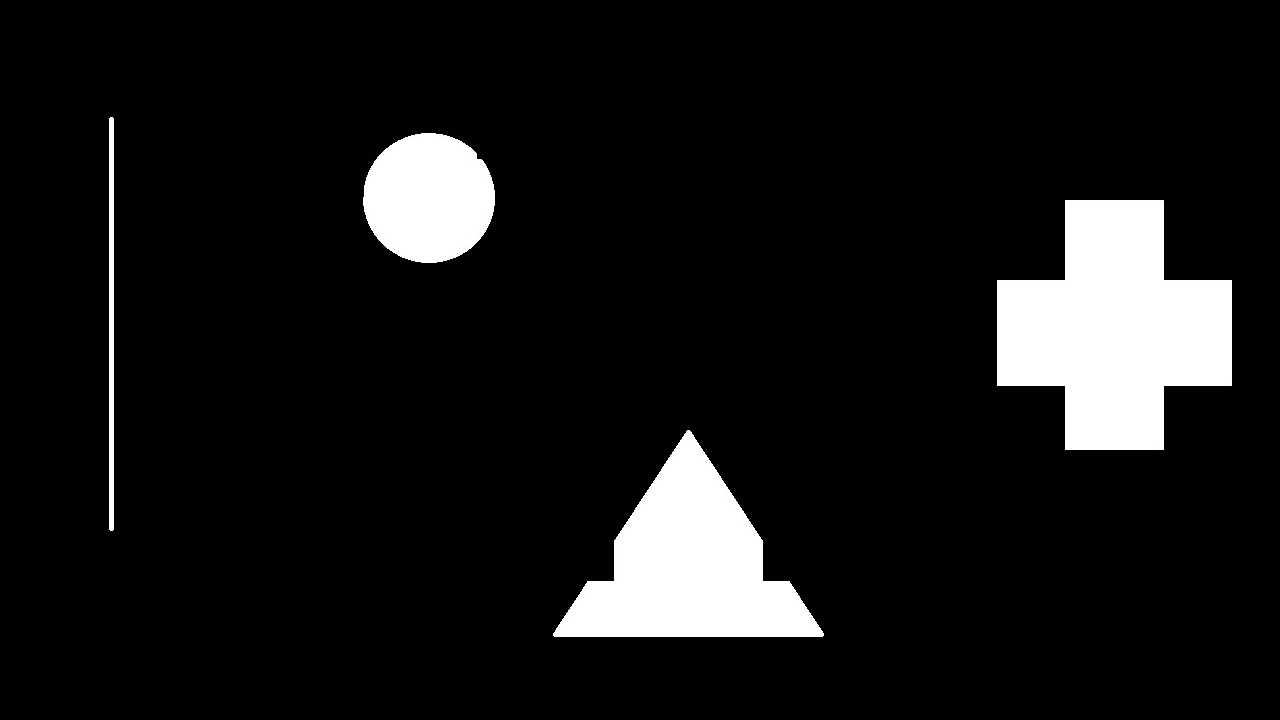

attempt failed


In [160]:
import cv2 
import numpy as np 
img = cv2.imread("practicum/operations_3.jpg",0) 

kernel = np.ones((2, 2),np.uint8) 
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) 

kernel = np.ones((50, 50),np.uint8) 
result = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) 


kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10)) 
result2 = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel2) 

kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (30,30)) 

kernel3 = np.array([[1,0,0],[1,1,0],[1,1,1]])
result3 = cv2.morphologyEx(result2, cv2.MORPH_CLOSE, kernel2) 

kernel3 = np.array([[1,0,0],[1,1,0],[1,1,1]])
result3 = cv2.morphologyEx(result3, cv2.MORPH_CLOSE, kernel2) 

show(img)
show(result)  
print("apply closing to eliminate the noise")
print("RESULT:")
show(result2)  
print("apply closing to correct the triangle with a kernel of lower traingle matrix")
show(result3)  
print("attempt failed")


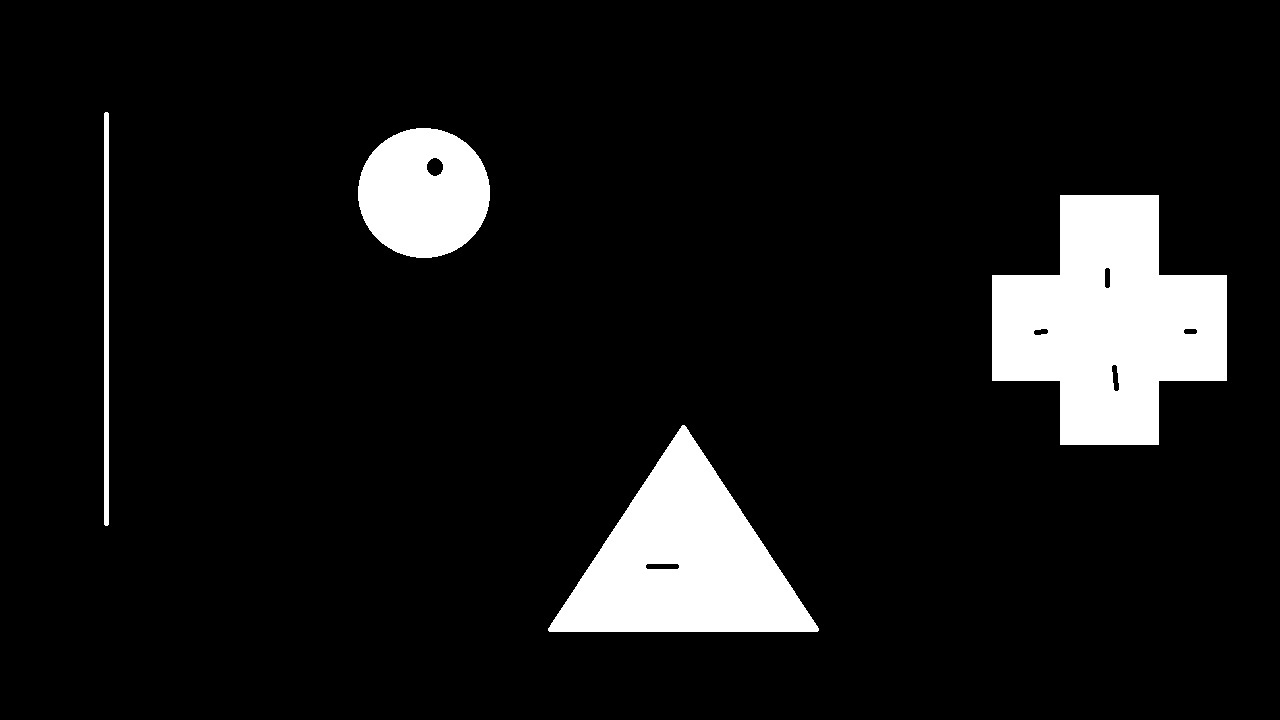

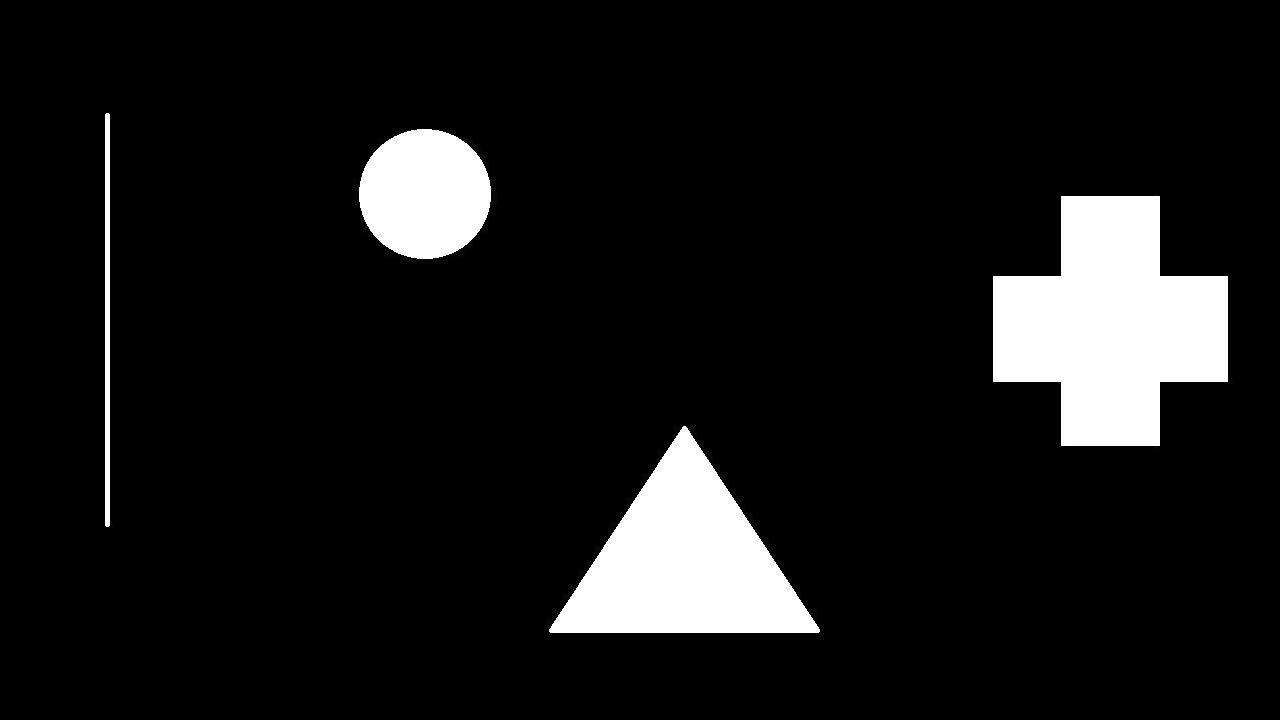

In [161]:
img = cv2.imread("practicum/operations_4.jpg",0) 
#We use  closing with a 50x50 kernel of ones in order to fill the holes of 
kernel = np.ones((50, 50),np.uint8) 
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) 
show(img)
print("RESULT:")
show(closing)

Unlike the operation4 the rest of the images are rather difficult to find an adequate kernel,morphology and kernel size that make it as perfect as the original image. The complexity of the problem is very high since there are 4 morphologies, infinite kernel size and shape, even we knew the features of each figure, they are yet different shapes and a single operation is difficult to fit them all. Hence we need to stack over the operations making the process even harder. 

Below, I proposed a method that may drive to have 100% fit images.

I intended to correct the images automatically by using function cv2.subtract as the loss function, and each time the algorithm tries to find the best fit for three parameters: the kernel size, morphology and shape of the kernel by finding the best score (which means the least difference between the original image and the candidate). 
However, after several trials, I eventually conclude that it is not viable doing in that way. Mainly because the substract function takes the global pixels, and gives back a global score. But what we have here are isolated local figures, hence having a good score does not necessarily mean to have a good local performance. Hence, I may need to implement genetic algorithm, especifically, the part of crossover between morphology. However, I don't have yet time for implementing it.

In [111]:
#op2
#hyperparameters
################################################################################################
kernel_size=50
kernel_structure =["Ones","Rect","Ellipse","Cross"]
m  = ["dilation","erosion"]
path = ["practicum\operations_2.jpg","practicum\operations_3.jpg","practicum\operations_4.jpg"]
################################################################################################
original = cv2.imread("practicum\operations_1.jpg")
def implementation(path,kernel_size,kernel_structure,morphology):
    hypers = []
    for morph in morphology: # dilation erosion
        res_lst = [100000000]
        hyper = [0,""]
        for s in kernel_structure:
            for k in range(3,kernel_size+1):
                if len(hypers) != 0:
                    ## class in an indept file
                    img = image_processing(path,hypers[morphology.index(morph-1)][0],hypers[morphology.index(morph-1)][1])
                else:
                    img = image_processing(path,kernel_structure,kernel_size)
                print(type(img))
                for i in range(10):#multiple level
                    if morph =="erosion":
                        img.erosion(k,s)
                    elif morph =="dilation": 
                        img.dilation(k,s)
                    # elif morph == "closing":
                    #     img.closing(k,s)           
                    # elif morph =="opening":
                    #     img.opening(k,s)
                    print(i)
                    # subtract == our cost function
                    # cannot autograd
                    res = (np.asarray(original) -np.asarray(img.image))**2
                    if res.sum() < min(res_lst):
                        res_lst.append(res.sum())
                        hyper = [k,s]
        print(hyper)
        hypers.append(hyper)
    return min(res_lst),hypers,img

res_lst, hyper,image = implementation(path[0],kernel_size,kernel_structure,m)

# print(hyper)

# op1_res = image_processing(path[0]).closing()

# original.display()
# op1.display()


this is the type of the image: <class 'numpy.ndarray'>
<class '__main__.image_processing'>
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
this is the type of the image: <class 'numpy.ndarray'>
<class '__main__.image_processing'>
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
this is the type of the image: <class 'numpy.ndarray'>
<class '__main__.image_processing'>
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
5

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [ ]:
#genetic algorithm 

#Roulette,elite
#cost function  -> subtract
#crossover -> multipoint 
#mutation ->simple mutation

op2 = cv2.imread("practicum/operation_2.jpg")
op2 = implementation(kernel_size,kernel_structure,m)

from numpy.random import randint
from numpy.random import rand
 
# objective function
def onemax(x):
	 return  -sum(x)
 
# tournament selection
def selection( pop , scores, k=3):
	# first random selection
	selection_ix = randint(len( pop ))
	for ix in randint(0, len( pop ), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop [selection_ix]
 
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return  [c1, c2]
 
# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]
 
# genetic algorithm
def genetic_algorithm( objective , n_bits, n_iter, n_pop, r_cross, r_mut):
	# initial population of random bitstring
	pop  = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
	# keep track of best solution
	best,best_eval = 0,objective(pop[0])
	# enumerate generations
	for gen in range(n_iter):
		# evaluate all candidates in the population
		scores = [ objective (c) for c in  pop ]
		# check for new best solution
		for i in range(n_pop):
			if scores[i] < best_eval:
				best, best_eval =  pop [i], scores[i]
				print(">%d, new best f(%s) = %.3f" % (gen,   pop [i], scores[i]))
		# select parents
		selected = [selection( pop , scores) for _ in range(n_pop)]
		# create the next generation
		children =  list ()
		for i in range(0, n_pop, 2):
			# get selected parents in pairs
			p1, p2 = selected[i], selected[i+1]
			# crossover and mutation
			for c in crossover(p1, p2, r_cross):
				# mutation
				mutation(c, r_mut)
				# store for next generation
				children.append(c)
		# replace population
		pop  = children
	return [best, best_eval]
 
# define the total iterations
n_iter = 100
# bits
n_bits = 20
# define the population size
n_pop = 100
# crossover rate
r_cross = 0.9
# mutation rate
r_mut = 1.0 / float(n_bits)
# perform the genetic algorithm search
best, score = genetic_algorithm(onemax, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
print('f(%s) = %f' % (best, score))

>0, new best f([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]) = -14.000
>0, new best f([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]) = -15.000
>1, new best f([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]) = -16.000
>2, new best f([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]) = -17.000
>3, new best f([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]) = -18.000
>4, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]) = -19.000
>7, new best f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000
Done!
f([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) = -20.000000
